# Sandbox calibration
with this notebook you can create or change the calibration of a sandbox setup.
Use the sliders in the widget to set the dimensions and vertical range of the sandbox and align the projected image of the kinect with the box.







## Some remarks on setting up the box

Please consider the following guidelines to make your sandbox experience as pleasant as possible:
- use a rectangular box, ideally with semitransparent (frosted) or opaque walls.
- position the kinect and projector in a central position over the box. the closer they are together the better!
- make sure the kinect is perfectly horizontal (=parallel to the floor of the box)
- the higer the distance between the sandbox and the sensor/projector the better! the distance should be at leat 1-1.5 times the longest dimension of your box! Don't worry if the sandbox does not cover the entire field of view of the kinect, the resolution will still be more than good enough in the end!
- adjust the keystone of the projector so that the egdes of the image are orthogonal. 
- adjust the position of the sandbox (or the projector/kinect) that the projected image is parallel to the box edges and covers the sandbox completely.
- set the projection mode that the image is not mirrored or flipped when you look down at the sand from the front of the box.

Now let us start with the calibration!



In [3]:
import os,sys
sys.path.append('./../../../open_AR_Sandbox/')
sys.path.append('./../../../gempy-1.16/')
import sandbox.sandbox as sb
#New by Daniel
#from sb import KinectV2

#import Sandbox as sb

### setup the sandbox
initialize the components of the sandbox and opens an output stream in a new Chrome tab. Drag the tab to the projector screen and set to fullscreen (F11).
If this step kills the kernel make sure there is not another notebook running with an active Kinect instance

In [4]:
kinect = sb.KinectV2()

(1080, 1920, 3) (424, 512)


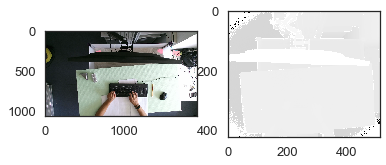

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
print(kinect.get_color().shape,kinect.get_frame().shape)
a=kinect.get_color()
b=np.flipud(kinect.get_frame())

plt.figure()
plt.subplot(1,2,1)
plt.imshow(a)
plt.subplot(1,2,2)
plt.imshow(b)

In [ ]:
import numpy as np
np.save('color.npy',a)
np.save('depth.npy',b)

In [ ]:
projector = sb.Projector(resolution = (1280,800))
projector.refresh = 100           #Set projector refresh interval in milliseconds. 100ms = 10Hz 
projector.work_directory="./temp"
projector.start_stream()          #Open an new Tab with sandbox output.
calibration = sb.Calibration(projector, associated_kinect=kinect)#projector.calibration
projector.set_calibration(calibration)

### Parameters:
* *rot_angle:* rotation of kinect in respect to projector 
* *x_lim, y_lim:* horizontal and vertical extent of projeced image in pixels
* *x_pos, y_pos:* offset of projected frame from top left corner 
* *scale_factor:* scaling factor from kinect pixels to projector pixels 
* *z_range:* vertical extend of the sandbox in mm distance from the kinect sensor. the vertical model extend is later mapped to these these values, so choose a z_range and model extend that is in the correct ratio with the horizontal dimension to avoid vertical exaggeration.
* *box_width, box_height:* horizontal extent of th sandbox in millimeters. THese values are only used to calculate the scale of the model but have no further effect.
* *legend:* switch legend on/off and set its size and position.
* *profile:* an area to display additional information like a profile. Currently under development.  
* *hot_area:* define an are to interact with the sandbox with markers (QR codes). Currently under development


### load calibration data from file

In [ ]:
calibration_infilename = "sandbox_v2.dat" 
calibration.load(calibration_file=calibration_infilename)

### optional: adjust appearance of calibration frame 

In [ ]:
calibration.contours = True     # show or hide contours
calibration.n_contours = 20     # number of contours between z_min and z_max
calibration.cmap = 'viridis' # name of colormap 
# calibration.contour_levels      # show the contour levels

### open calibration widget 
### Parameters:
* *rot_angle:* rotation of kinect in respect to projector 
* *x_lim, y_lim:* horizontal and vertical extent of projeced image in pixels
* *x_pos, y_pos:* offset of projected frame from top left corner 
* *scale_factor:* scaling factor from kinect pixels to projector pixels 
* *z_range:* vertical extend of the sandbox in mm distance from the kinect sensor. the vertical model extend is later mapped to these these values, so choose a z_range and model extend that is in the correct ratio with the horizontal dimension to avoid vertical exaggeration.
* *box_width, box_height:* horizontal extent of th sandbox in millimeters. THese values are only used to calculate the scale of the model but have no further effect.
* *legend:* switch legend on/off and set its size and position.
* *profile:* an area to display additional information like a profile. Currently under development.  
* *hot_area:* define an are to interact with the sandbox with markers (QR codes). Currently under development

### how to calibrate
In the beginning you will see a depth image of the kinect in the upper left corner of the sandbox that is most probably not aligned at all with the sand. In the following we will step-by-step adjust the parameters to align the kinect, projector sandbox with each other. 
the image updates each time the value of a slider is changed. 

1. first of all it is time to get your hands dirty: make a huge pile of sand in the middle of the box. try to build it as high as possible or reasonable. and make sure that you have some spots on the left and right of the pile where is no sand left and you can see the bottom of the box. 
2. now adjust the z-range sliders to define the top and bottom of the box. pixels outside the range as well as invalid pixels that the kinect does not recognize atre white.  If possible you should set it up that the (z_max - z_min) is equal to the shorter horizontal dimension of the box.
3. adjust rot_angle to make the edges of the box in the image parallel to the edges of the real box. Make sure the image is not upside down.
4. adjust the left x_lim slider to cut away everything that is left of the box boundary. 
5. do the same for the top edge by adjusting the right y_lim slider.
6. now align the top left corner of the image with the top left corner of the sandbox by adjusting x_pos and y_pos
7. increase the scale_factor slider to make the projected image align with the real topography in the sandbox. use the bottom right corner of the sandbox as reference. 
8.adjust the right x_lim and the left y_lim sliders to cut off the image at he bottom and right edge. 

click "close calibration" when you are finished

In [ ]:
calibration.create()

## save calibration data to file

In [ ]:
calibration_outfilename = "sandbox_v2.dat" 
calibration.save(calibration_file=calibration_outfilename)

In [ ]:
projector.start_stream()